In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from scipy import stats
from sklearn import metrics
from scipy import stats
import datetime as dt

In [3]:
data_df = pd.read_csv('data_signs.csv', index_col=0)
data_df

,ctl_loading_date,ctl_loading,string_quantity,duplicated_by_loading,corrections,delay,day_of_week,cumulative_missing_days,rank
0,2018-04-09,38463471715,435,12,28,0 days,0,0,1
1,2018-04-10,36624943566,476,7,31,0 days,1,0,1
2,2018-04-11,90124869960,458,12,30,0 days,2,0,1
3,2018-04-12,54580391004,443,10,29,0 days,3,0,1
4,2018-04-13,80543078668,458,10,30,0 days,4,0,1
...,...,...,...,...,...,...,...,...,...
2290,2024-03-11,30656997473,467,30,34,0 days,0,162,1
2291,2024-03-12,61550260885,458,26,34,0 days,1,162,1
2292,2024-03-13,57912146515,458,29,34,0 days,2,162,1
2293,2024-03-14,6038571654,422,26,31,0 days,3,162,1


In [4]:
# вычитаем из ранга единицу (по приколу)
data_df['rank'] -= 1

In [5]:
# создаем новый булев признак rankTF, который равен 1 если rank > 0
data_df['rankTF'] = (data_df['rank'] > 0).astype('int')

In [6]:
data_df

,ctl_loading_date,ctl_loading,string_quantity,duplicated_by_loading,corrections,delay,day_of_week,cumulative_missing_days,rank,rankTF
0,2018-04-09,38463471715,435,12,28,0 days,0,0,0,0
1,2018-04-10,36624943566,476,7,31,0 days,1,0,0,0
2,2018-04-11,90124869960,458,12,30,0 days,2,0,0,0
3,2018-04-12,54580391004,443,10,29,0 days,3,0,0,0
4,2018-04-13,80543078668,458,10,30,0 days,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2290,2024-03-11,30656997473,467,30,34,0 days,0,162,0,0
2291,2024-03-12,61550260885,458,26,34,0 days,1,162,0,0
2292,2024-03-13,57912146515,458,29,34,0 days,2,162,0,0
2293,2024-03-14,6038571654,422,26,31,0 days,3,162,0,0


In [7]:
# посмотрим с каким типом переменных нам предстоит работать
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2295 entries, 0 to 2294
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ctl_loading_date         2295 non-null   object
 1   ctl_loading              2295 non-null   int64 
 2   string_quantity          2295 non-null   int64 
 3   duplicated_by_loading    2295 non-null   int64 
 4   corrections              2295 non-null   int64 
 5   delay                    2295 non-null   object
 6   day_of_week              2295 non-null   int64 
 7   cumulative_missing_days  2295 non-null   int64 
 8   rank                     2295 non-null   int64 
 9   rankTF                   2295 non-null   int32 
dtypes: int32(1), int64(7), object(2)
memory usage: 188.3+ KB


In [8]:
data_df['ctl_loading_date'] = pd.to_datetime(data_df['ctl_loading_date'], format="%Y-%m-%d")
data_df = data_df[data_df['ctl_loading_date'] != '2024-03-15']
data_df.tail()

,ctl_loading_date,ctl_loading,string_quantity,duplicated_by_loading,corrections,delay,day_of_week,cumulative_missing_days,rank,rankTF
2289,2024-03-10,70653532184,492,30,36,0 days,6,162,0,0
2290,2024-03-11,30656997473,467,30,34,0 days,0,162,0,0
2291,2024-03-12,61550260885,458,26,34,0 days,1,162,0,0
2292,2024-03-13,57912146515,458,29,34,0 days,2,162,0,0
2293,2024-03-14,6038571654,422,26,31,0 days,3,162,0,0


In [9]:
data_df.loc[:, 'ctl_loading_date'] = data_df['ctl_loading_date'].map(dt.datetime.toordinal)
data_df['delay'] = data_df['delay'].astype(str).str.replace(' days', '').astype(int)

C:\Users\Дмитрий\AppData\Local\Temp\ipykernel_15804\1319833253.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['delay'] = data_df['delay'].astype(str).str.replace(' days', '').astype(int)


In [10]:
data_df

,ctl_loading_date,ctl_loading,string_quantity,duplicated_by_loading,corrections,delay,day_of_week,cumulative_missing_days,rank,rankTF
0,736793,38463471715,435,12,28,0,0,0,0,0
1,736794,36624943566,476,7,31,0,1,0,0,0
2,736795,90124869960,458,12,30,0,2,0,0,0
3,736796,54580391004,443,10,29,0,3,0,0,0
4,736797,80543078668,458,10,30,0,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2289,738955,70653532184,492,30,36,0,6,162,0,0
2290,738956,30656997473,467,30,34,0,0,162,0,0
2291,738957,61550260885,458,26,34,0,1,162,0,0
2292,738958,57912146515,458,29,34,0,2,162,0,0


In [11]:
data_df.describe().round(2)

,ctl_loading_date,ctl_loading,string_quantity,duplicated_by_loading,corrections,delay,day_of_week,cumulative_missing_days,rank,rankTF
count,2294.00,2.294000e+03,2294.00,2294.00,2294.00,2294.00,2294.0,2294.00,2294.00,2294.00
mean,737900.49,4.981626e+10,433.54,20.51,29.99,24.28,3.0,78.75,0.21,0.13
std,629.74,2.854327e+10,97.59,7.23,5.69,153.63,2.0,51.36,0.68,0.33
min,736793.00,1.642463e+08,1.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00
25%,737355.25,2.536851e+10,441.00,17.00,28.00,0.00,1.0,28.00,0.00,0.00
50%,737913.50,5.062413e+10,458.00,22.00,30.00,0.00,3.0,76.00,0.00,0.00
75%,738454.00,7.375767e+10,466.00,26.00,34.00,0.00,5.0,133.00,0.00,0.00
max,738959.00,9.846772e+10,497.00,33.00,62.00,1890.00,6.0,162.00,5.00,1.00


In [12]:
# посмотрим тип переменных теперь
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2294 entries, 0 to 2293
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   ctl_loading_date         2294 non-null   int64
 1   ctl_loading              2294 non-null   int64
 2   string_quantity          2294 non-null   int64
 3   duplicated_by_loading    2294 non-null   int64
 4   corrections              2294 non-null   int64
 5   delay                    2294 non-null   int32
 6   day_of_week              2294 non-null   int64
 7   cumulative_missing_days  2294 non-null   int64
 8   rank                     2294 non-null   int64
 9   rankTF                   2294 non-null   int32
dtypes: int32(2), int64(8)
memory usage: 179.2 KB


In [13]:
predict_data = data_df.copy()
predict_data.drop(['Unnamed: 0'], axis=1, inplace=True)

KeyError: "['Unnamed: 0'] not found in axis"

In [ ]:
# посчитаем коэффициенты корреляции для всего нового датафрейма
# получается корреляционная матрица
corr_matrix = predict_data.corr().round(2)
corr_matrix.style.background_gradient(cmap='coolwarm')

,ctl_loading_date,ctl_loading,string_quantity,duplicated_by_loading,corrections,delay,day_of_week,cumulative_missing_days,rank,rankTF
ctl_loading_date,1.000000,0.040000,-0.160000,0.540000,0.200000,0.140000,0.010000,0.990000,0.080000,0.120000
ctl_loading,0.040000,1.000000,-0.030000,0.010000,-0.030000,-0.010000,0.020000,0.040000,0.020000,0.020000
string_quantity,-0.160000,-0.030000,1.000000,0.680000,0.660000,-0.670000,-0.000000,-0.170000,-0.270000,-0.550000
duplicated_by_loading,0.540000,0.010000,0.680000,1.000000,0.660000,-0.440000,0.020000,0.530000,-0.150000,-0.340000
corrections,0.200000,-0.030000,0.660000,0.660000,1.000000,-0.310000,0.010000,0.210000,-0.120000,-0.250000
delay,0.140000,-0.010000,-0.670000,-0.440000,-0.310000,1.000000,0.010000,0.150000,0.200000,0.420000
day_of_week,0.010000,0.020000,-0.000000,0.020000,0.010000,0.010000,1.000000,0.010000,0.020000,0.010000
cumulative_missing_days,0.990000,0.040000,-0.170000,0.530000,0.210000,0.150000,0.010000,1.000000,0.080000,0.130000
rank,0.080000,0.020000,-0.270000,-0.150000,-0.120000,0.200000,0.020000,0.080000,1.000000,0.830000
rankTF,0.120000,0.020000,-0.550000,-0.340000,-0.250000,0.420000,0.010000,0.130000,0.830000,1.000000


In [ ]:
# мы также можем построить диаграммы рассеяния, например,
# между целевой переменной string_quantity и ctl_loading_date, duplicated_by_loading, corrections, delay, cumulative_missing_days, rank

# подготовим данные (поместим столбцы датафрейма в переменные)
# самые интересные для нас зависимости
x1 = predict_data['duplicated_by_loading']
x2 = predict_data['delay']
y1 = predict_data['string_quantity']

In [14]:
# зададим размер и построим первый график
plt.figure(figsize = (10,6))
plt.scatter(x1, y1)
# добавим подписи
plt.xlabel('количество полных дублей в поставке', fontsize = 10)
plt.ylabel('Размер поставки (количество строк)', fontsize = 10)

NameError: name 'x1' is not defined

<Figure size 1000x600 with 0 Axes>

In [15]:
# зададим размер и построим второй график
plt.figure(figsize = (10,6))
plt.scatter(x2, y1)
# добавим подписи
plt.xlabel('Медианная разница между датой поставки и датами на которые рассчитываются котировки', fontsize = 10)
plt.ylabel('Размер поставки (количество строк)', fontsize = 10)

NameError: name 'x2' is not defined

<Figure size 1000x600 with 0 Axes>

In [16]:
# Зададим матрицы регрессионного дизайна
y = predict_data['string_quantity'] # зависимая переменная
predict_data['duplicated_by_loading_log'] = np.log(predict_data['duplicated_by_loading'] + 1e-8)
predict_data['delay_log'] = np.log(predict_data['delay'] + 1e-8)
X = predict_data[['cumulative_missing_days', 'duplicated_by_loading', 'corrections', 'rank', 'duplicated_by_loading_log', 'delay_log', 'rankTF']] 
X.head()

,cumulative_missing_days,duplicated_by_loading,corrections,rank,duplicated_by_loading_log,delay_log,rankTF
0,0,12,28,0,2.484907,-18.420681,0
1,0,7,31,0,1.945910,-18.420681,0
2,0,12,30,0,2.484907,-18.420681,0
3,0,10,29,0,2.302585,-18.420681,0
4,0,10,30,0,2.302585,-18.420681,0


In [17]:
from sklearn.model_selection import train_test_split

# разделим выборку на обучающую и тестовую выборку
# размер тестовой выборки составит 40%
# также зададим точку отсчета для воспроизводимости
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.4,
                                                    random_state = 42)

In [18]:
# посмотрим на новую размерность обучающей
print(X_train.shape, y_train.shape)

# и тестовой выборки
print(X_test.shape, y_test.shape)

(1376, 7) (1376,)
(918, 7) (918,)


## Обучение и оценка качества модели

Метод fit отвечает за реализацию метода наименьших квадратов, который подбирает весовые коэффициенты линейной функции аналитически. Метод predict использует полученные коэффициенты для прогноза.

In [19]:
# из набора линейных моделей библиотеки sklearn импортируем линейную регрессию
from sklearn.linear_model import LinearRegression
 
# создадим объект этого класса и запишем в переменную model
model = LinearRegression()
 
# обучим нашу модель
model.fit(X_train, y_train)

LinearRegression()

In [20]:
# выведем наклон и сдвиг с помощью атрибутов coef_ и intercept_ соответственно
print(model.coef_, model.intercept_)

[-7.22593512e-01  6.06921612e+00  4.50662993e+00  2.25143402e+01
  1.11297591e-01 -3.32198584e+01  5.71595547e+02] -370.9851650510427


In [21]:
# Попробуем получить предсказания на основе тестовой выборки
y_pred = model.predict(X_test)

# выведем первые 10 значений с помощью диапазона индексов
print(y_pred[:10])

[440.4076819  487.95920969 464.64139648 455.61131708 459.55111528
 455.36995543 461.57330437 455.13090717 457.19840154 489.5360095 ]


In [22]:
print(y_test[:10])

422     450
1287    478
208     486
782     458
759     481
2060    458
430     467
1351    458
111     458
1726    483
Name: string_quantity, dtype: int64


Text(0, 0.5, 'Predicted')

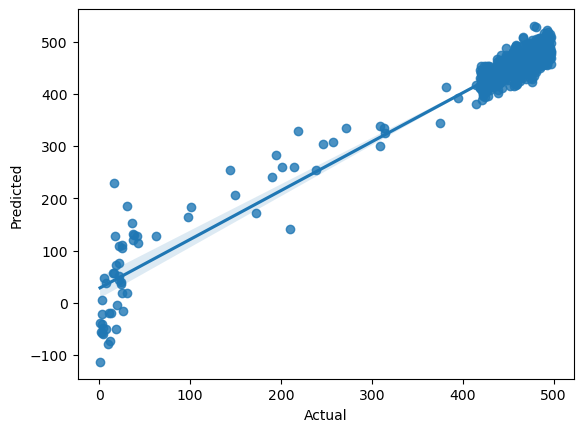

In [23]:
import seaborn as sns
sns.regplot(x=y_test, y=y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [24]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print('mse: %.3f, mae: %.3f' % (mse, mae))

mse: 562.650, mae: 15.641


In [25]:
# импортируем модуль метрик
from sklearn import metrics

# выведем корень среднеквадратической ошибки
# сравним тестовые и прогнозные значения объемов поставок
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error (RMSE): 23.72024497809576


In [26]:
# посмотрим на еще одну метрику, R^2 (Какую долю изменчивости целевой переменной объясняет модель, учитывающая все признаки)
print('R2:', np.round(metrics.r2_score(y_test, y_pred), 2))

R2: 0.94


In [27]:
metrics.r2_score(y_test, y_pred), model.score(X_test, y_test)

(0.942643875776364, 0.942643875776364)

In [28]:
# Скорректированный коэффициент детерминации
# возьмем n и k для тестовых данных
n, k = X_test.shape[0], X_test.shape[1]
n, k

(918, 7)

In [29]:
# подставим их в формулу
1 - (1 - model.score(X_test, y_test)) * ((n - 1) / (n - k - 1))

0.9422026748207976

In [30]:
new_data = pd.DataFrame({'cumulative_missing_days': 162,
                        'duplicated_by_loading': 29,
                        'corrections': 34,
                        'delay': '0 days',
                        'rank': 1,
                        'rankTF': 0
                        }, index=[0])
new_data

,cumulative_missing_days,duplicated_by_loading,corrections,delay,rank,rankTF
0,162,29,34,0 days,1,0


In [31]:
new_data['delay'] = new_data['delay'].astype(str).str.replace(' days', '').astype(float)
new_data['duplicated_by_loading_log'] = np.log(new_data['duplicated_by_loading'] + 1e-8)
new_data['delay_log'] = np.log(new_data['delay'] + 1e-8)

In [32]:
new_data = new_data[['cumulative_missing_days', 'duplicated_by_loading', 'corrections', 'rank', 'duplicated_by_loading_log', 'delay_log', 'rankTF']]

In [33]:
new_data

,cumulative_missing_days,duplicated_by_loading,corrections,rank,duplicated_by_loading_log,delay_log,rankTF
0,162,29,34,1,3.367296,-18.420681,0


## Построим доверительный интервал для предсказанного значения модели. Вычислим:

1. Остатки регрессии (residuals) как разницу между реальными (y_test) и предсказанными значениями (y_pred) зависимой переменной string_quantity
2. Стандартную ошибку (std_error) с учетом числа степеней свободы (k+1).
3. t-критерий Стьюдента,  зависит от числа степеней свободы и уровня значимости (возьмем 10%).
4. Стандартную ошибку прогноза (pred_std_error).
5. Доверительный интервал (conf_interval) для предсказанного значения (pred).

In [34]:
prediction = model.predict(new_data)
pred = prediction[0]

In [35]:
residuals = y_test - y_pred
std_error = residuals.std(ddof=k+1)
t_value = stats.t.ppf(1 - 0.1 / 2, df=len(y_test) - k - 1)
pred_std_error = std_error * np.sqrt(1 + 1/len(y_test))
conf_interval = pred - t_value * pred_std_error, pred + t_value * pred_std_error
print("Доверительный интервал для предсказанного значения:", conf_interval)
print("Предсказанное значение:",  pred)

Доверительный интервал для предсказанного значения: (436.76013931288367, 515.2576380486137)
Предсказанное значение: 476.00888868074867
